In [152]:

import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FactorAnalysis
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
!pip install sklearn
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('Cleaned_Laptop_data.csv')

In [4]:
df.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

In [107]:
df['USD'] = df['latest_price'].apply(lambda latest_price: latest_price * .013) 
df['USD2'] = df['old_price'].apply(lambda latest_price: latest_price * .013) 
df['ramgb'] = df['ram_gb'].apply(lambda ram_gb: +4 if ram_gb == "4 GB GB"
else (+8 if ram_gb == "8 GB GB" else (+16 if ram_gb == "16 GB GB" else 0))) 

In [69]:
df.columns = df.columns.str.strip()

In [135]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:>

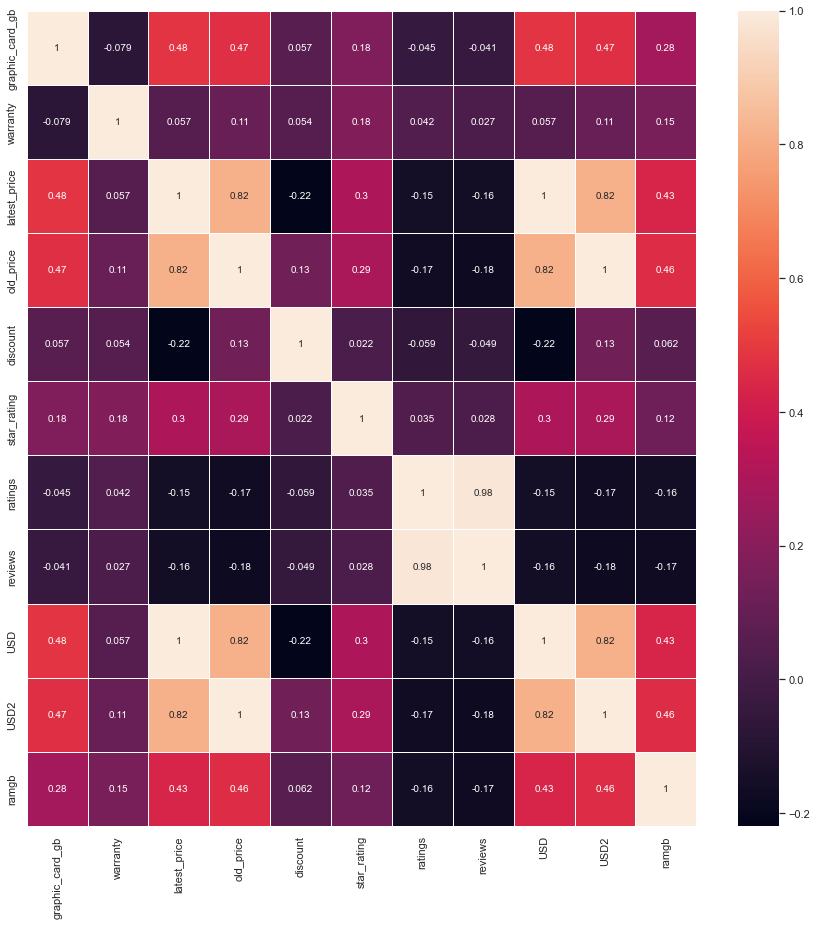

In [166]:
plt.figure(figsize(15,15))
sns.heatmap(df.corr(), annot=True, linewidth=0.5)

<Figure size 720x504 with 0 Axes>

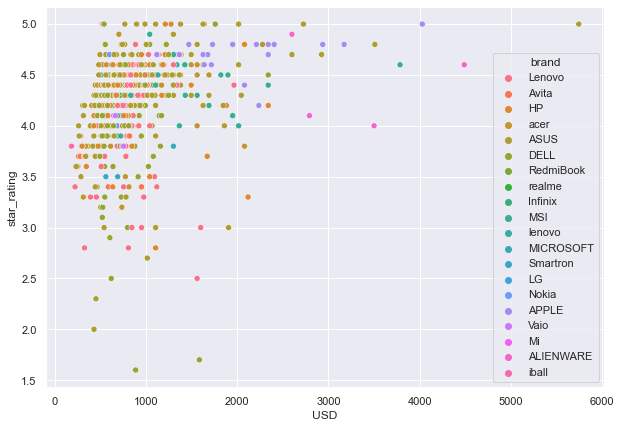

<Figure size 720x504 with 0 Axes>

In [177]:
sns.scatterplot(data=df, x="USD", y="star_rating", hue="brand")
plt.figure(figsize(10,7))

In [ ]:
#linear regression

In [76]:
df = df[df.star_rating != 0] 

In [77]:
X = df[['star_rating']]

In [78]:
y = df['USD']

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .33)

In [80]:
lr = LinearRegression() 

In [81]:
lr.fit(x_train, y_train)

LinearRegression()

In [82]:
lr.score(x_test, y_test)

0.07827783807584132

In [83]:
print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)

Coefficients: 
 [390.86872713]
Intercept: 
 -742.7099571457001


In [84]:
y_pred = lr.predict(x_test)

In [85]:
num = mean_squared_error(y_test ,y_pred , squared = True)
num

322183.00044114876

In [86]:
np.sqrt(num)

567.6116634118337

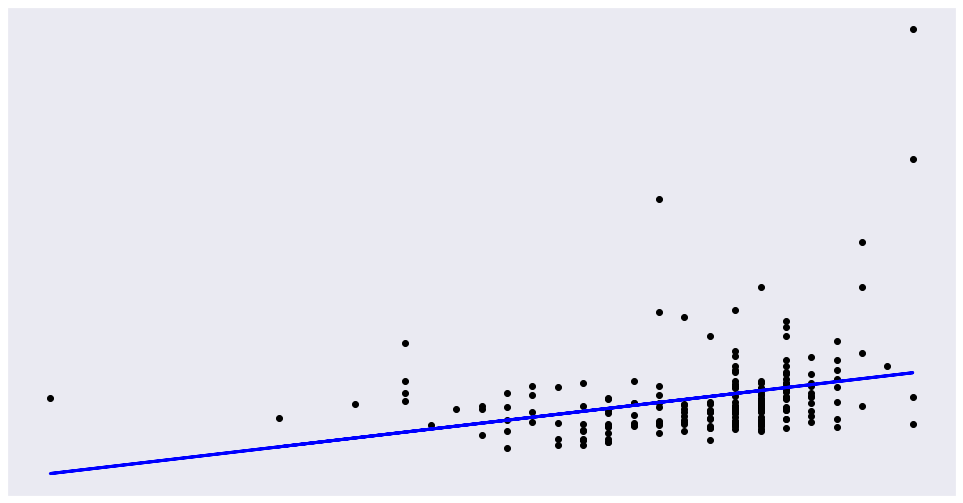

In [87]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [120]:
X = df[['star_rating', 'USD2', 'ramgb']]
y = df['USD']

In [121]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .33)

In [122]:
train = x_train.copy()
train['USD'] = y_train
y_train

61      558.870
277     883.870
651    3500.770
121     584.870
132     504.387
         ...   
731     545.870
240     773.370
866    1065.870
37      467.870
377     883.870
Name: USD, Length: 423, dtype: float64

In [123]:
correlation_threshold = train.corr()['USD'].median() - 0.1 
correlated_features = list(train.corr()[np.abs(train.corr()['USD']) > correlation_threshold]['USD'].index)
correlated_features.remove('USD')

In [124]:
x_train_select = x_train[correlated_features]
x_test_select = x_test[correlated_features]

In [125]:
lr.fit(x_train_select, y_train)

LinearRegression()

In [126]:
print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)

Coefficients: 
 [0.72383856]
Intercept: 
 117.07621133433247


In [127]:
y_pred = lr.predict(x_test_select)

In [128]:
num = mean_squared_error(y_test ,y_pred , squared = True)
num

67709.29768217728

In [129]:
np.sqrt(num)

260.21010295946866

In [130]:
lr.score(x_test_select, y_test)

0.7745949117691262

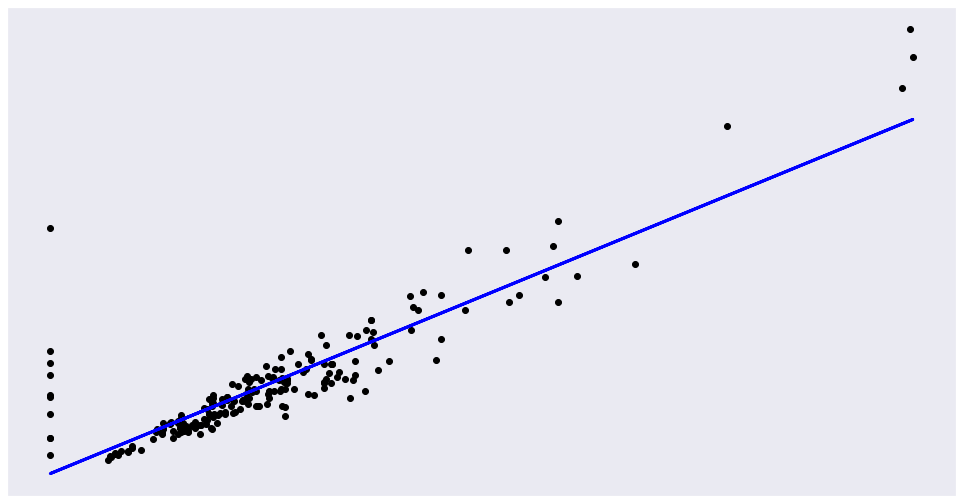

In [132]:
plt.scatter(x_test_select, y_test,  color='black')
plt.plot(x_test_select, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
#clustering

In [157]:
x = modified_df = df[['USD', 'star_rating']]

In [158]:
kmeans = KMeans(3)

In [160]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,

<Figure size 720x504 with 0 Axes>

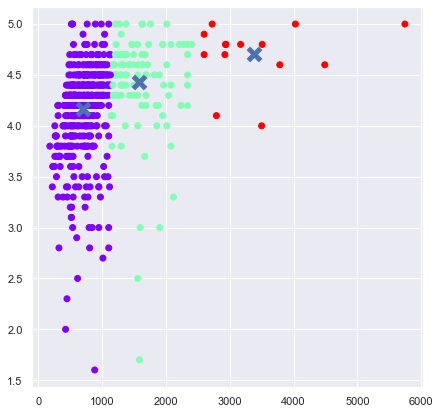

<Figure size 720x504 with 0 Axes>

In [176]:
data_with_clusters = modified_df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['USD'],data_with_clusters['star_rating'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.figure(figsize(10,7))

In [162]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)


<Figure size 720x504 with 0 Axes>

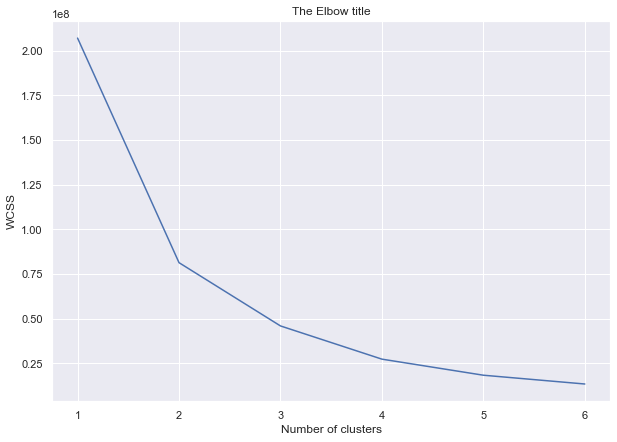

<Figure size 720x504 with 0 Axes>

In [178]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.figure(figsize(10,7))